# **Diabetes Prediction**

The Diabetes Prediction Dataset consists of medical and demographic data of patients along with their diabetes status (positive or negative). The dataset contains various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. These features are used to predict whether a patient has diabetes or not.

**Business Case Scenario:**
Enhancing Diabetes Diagnosis and Empowering Healthcare Providers for Early Diagnosis.

**Problem Statement:**
    Diabetes remains a prevalent chronic disease, affecting millions worldwide. Diabetes is characterized by high blood sugar levels, which can lead to serious complications if left untreated.
	Collaborative efforts between the healthcare system and the insurance industry by implementing the risk assessment models.

**Solution:**
Collaborative Data Sharing Platform for Machine Learning Algorithms
Integrating the Electronic Health Record (EHR) systems enables healthcare providers to identify patients at high risk for diabetes early on.
Deploying Machine Learning models would predict the likelihood of a person developing diabetes with the help of their complete health records. This would lead to providing efficient medications and treatment.

Collaboration between healthcare providers and insurance companies in diabetes care can lead to better outcomes for patients, more accurate risk assessment models, and cost savings for everyone involved. By using data-driven insights and promoting collaboration, this initiative can pave the way for a more effective and efficient healthcare system.


### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from io import StringIO
import requests

url = "https://drive.google.com/file/d/1BRqljhBZ6sOUHOI83ohCtl48kR2ntP2O/view?usp=sharing"

file_id = url.split('/')[-2]

dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url_2 = requests.get(dwn_url).text
csv_raw = StringIO(url_2)

data = pd.read_csv(csv_raw)

### **Data Information**

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Variable Types**

Categorical Variables


*   Gender
*   Hypertension
*   Heart Diesease
*   Smoking History
*   Diabetes (Target Variable)

Numerical Variables

* Age
* BMI
* HbA1c Level
* Blood Glucose Level




In [5]:
data["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
cat_columns = ["gender","hypertension","heart_disease","smoking_history","diabetes"]
num_columns = ["age","bmi","HbA1c_level","blood_glucose_level"]

In [7]:
def unique_values(data):
    for item in cat_columns:
        print(item)
        print(data[item].unique())
        print("-"*50)

unique_values(data)

gender
['Female' 'Male' 'Other']
--------------------------------------------------
hypertension
[0 1]
--------------------------------------------------
heart_disease
[1 0]
--------------------------------------------------
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current']
--------------------------------------------------
diabetes
[0 1]
--------------------------------------------------


Based on the above results for the hypertension and heart disease categorical column dummies are created already.

For smoking history column has few missing values "No Info" and we need to remove those missing values. Further, we can reduce category to three as "present", "past", and "Non smoker" so that it will be helpful for creating dummies and creating the model.

### **Data Cleaning and Transformation**

In [8]:
data = data.convert_dtypes()

In [9]:
data.dtypes

gender                  string
age                    Float64
hypertension             Int64
heart_disease            Int64
smoking_history         string
bmi                    Float64
HbA1c_level            Float64
blood_glucose_level      Int64
diabetes                 Int64
dtype: object

In [10]:
def smoking_trans_condition(x):
    if x == "former" or x == "not current" or x == "ever":
        return "past"
    elif x == "current":
        return "present"
    elif x == "never":
        return "non smoker"
    else:
        return "no info"

In [11]:
data["smoking_history_trans"] = data["smoking_history"].apply(smoking_trans_condition)

In [12]:
data["smoking_history_trans"].unique()

array(['non smoker', 'no info', 'present', 'past'], dtype=object)

In [13]:
data.head(26)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_trans
0,Female,80.0,0,1,never,25.19,6.6,140,0,non smoker
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,no info
2,Male,28.0,0,0,never,27.32,5.7,158,0,non smoker
3,Female,36.0,0,0,current,23.45,5.0,155,0,present
4,Male,76.0,1,1,current,20.14,4.8,155,0,present
5,Female,20.0,0,0,never,27.32,6.6,85,0,non smoker
6,Female,44.0,0,0,never,19.31,6.5,200,1,non smoker
7,Female,79.0,0,0,No Info,23.86,5.7,85,0,no info
8,Male,42.0,0,0,never,33.64,4.8,145,0,non smoker
9,Female,32.0,0,0,never,27.32,5.0,100,0,non smoker


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   gender                 100000 non-null  string 
 1   age                    100000 non-null  Float64
 2   hypertension           100000 non-null  Int64  
 3   heart_disease          100000 non-null  Int64  
 4   smoking_history        100000 non-null  string 
 5   bmi                    100000 non-null  Float64
 6   HbA1c_level            100000 non-null  Float64
 7   blood_glucose_level    100000 non-null  Int64  
 8   diabetes               100000 non-null  Int64  
 9   smoking_history_trans  100000 non-null  object 
dtypes: Float64(3), Int64(4), object(1), string(2)
memory usage: 8.3+ MB


In [15]:
data_cleaned = data[data["smoking_history"] != "No Info"]

In [16]:
data_cleaned.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_trans
0,Female,80.0,0,1,never,25.19,6.6,140,0,non smoker
2,Male,28.0,0,0,never,27.32,5.7,158,0,non smoker
3,Female,36.0,0,0,current,23.45,5.0,155,0,present
4,Male,76.0,1,1,current,20.14,4.8,155,0,present
5,Female,20.0,0,0,never,27.32,6.6,85,0,non smoker
6,Female,44.0,0,0,never,19.31,6.5,200,1,non smoker
8,Male,42.0,0,0,never,33.64,4.8,145,0,non smoker
9,Female,32.0,0,0,never,27.32,5.0,100,0,non smoker
10,Female,53.0,0,0,never,27.32,6.1,85,0,non smoker
11,Female,54.0,0,0,former,54.7,6.0,100,0,past


In [17]:
data_cleaned = data_cleaned.convert_dtypes()

In [18]:
data_cleaned.dtypes

gender                    string
age                      Float64
hypertension               Int64
heart_disease              Int64
smoking_history           string
bmi                      Float64
HbA1c_level              Float64
blood_glucose_level        Int64
diabetes                   Int64
smoking_history_trans     string
dtype: object

In [19]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 64184 non-null  string 
 1   age                    64184 non-null  Float64
 2   hypertension           64184 non-null  Int64  
 3   heart_disease          64184 non-null  Int64  
 4   smoking_history        64184 non-null  string 
 5   bmi                    64184 non-null  Float64
 6   HbA1c_level            64184 non-null  Float64
 7   blood_glucose_level    64184 non-null  Int64  
 8   diabetes               64184 non-null  Int64  
 9   smoking_history_trans  64184 non-null  string 
dtypes: Float64(3), Int64(4), string(3)
memory usage: 5.8 MB


In [20]:
data_cleaned["gender"].value_counts()

Female    38852
Male      25320
Other        12
Name: gender, dtype: Int64

There is only 12 records for "Other" and so we can drop that data record for model creation.

In [21]:
data_v2 = data_cleaned[data_cleaned["gender"]!="Other"]

In [22]:
data_v2 = data_v2.drop_duplicates(keep = "last")

In [23]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63247 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 63247 non-null  string 
 1   age                    63247 non-null  Float64
 2   hypertension           63247 non-null  Int64  
 3   heart_disease          63247 non-null  Int64  
 4   smoking_history        63247 non-null  string 
 5   bmi                    63247 non-null  Float64
 6   HbA1c_level            63247 non-null  Float64
 7   blood_glucose_level    63247 non-null  Int64  
 8   diabetes               63247 non-null  Int64  
 9   smoking_history_trans  63247 non-null  string 
dtypes: Float64(3), Int64(4), string(3)
memory usage: 5.7 MB


In [24]:
data_v2[num_columns].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,63247.0,63247.0,63247.0,63247.0
mean,46.561928,28.440772,5.566768,139.691985
std,19.532614,6.561721,1.096508,42.236352
min,0.16,10.08,3.5,80.0
25%,31.0,24.52,4.8,100.0
50%,47.0,27.32,5.8,140.0
75%,61.0,31.2,6.2,159.0
max,80.0,91.82,9.0,300.0


* **Age:** The sample has an average age of 46.54 years, which means that the individuals’ average age is around mid-40s. The sample has very young individuals with a minimum age of 0.16 years and also older individuals with a maximum age of 80 years.

* **BMI (Body Mass Index):** The average BMI of the individuals in the sample is 28.42, which indicates that the sample has more  slightly overweight. The minimum BMI of 10.08 and the maximum BMI of 91.82 suggest that the sample includes individuals with a wide range of BMI values, including some very low and high values.

* **Blood Glucose Level:** The average blood glucose level among the individuals in the sample is 139.63, which falls within the normal range. However, the range of blood glucose levels within the sample is quite wide, with the lowest value being 80.0 and the highest value being 300.0. This indicates that there is a significant amount of variability in the blood glucose levels among the individuals in the sample.

* **HbA1c Level:** The average HbA1c level in the sample is 5.56, which suggests that the participants have relatively normal levels. This indicates that the sample includes individuals whose HbA1c levels fall within the normal range.

### **Data Visualization and Interpretation**

In [25]:
for i in num_columns:
    print("Skewness of",i)
    print(round(data_v2[i].skew(),2))
    print("-"*35)

Skewness of age
-0.06
-----------------------------------
Skewness of bmi
1.25
-----------------------------------
Skewness of HbA1c_level
0.02
-----------------------------------
Skewness of blood_glucose_level
0.91
-----------------------------------


* Age, HbA1c_level -> Fairly Symmetrical
* **BMI -> Highly Skewed**
* blood_glucose_level -> Moderately Skewed

Column Name: age


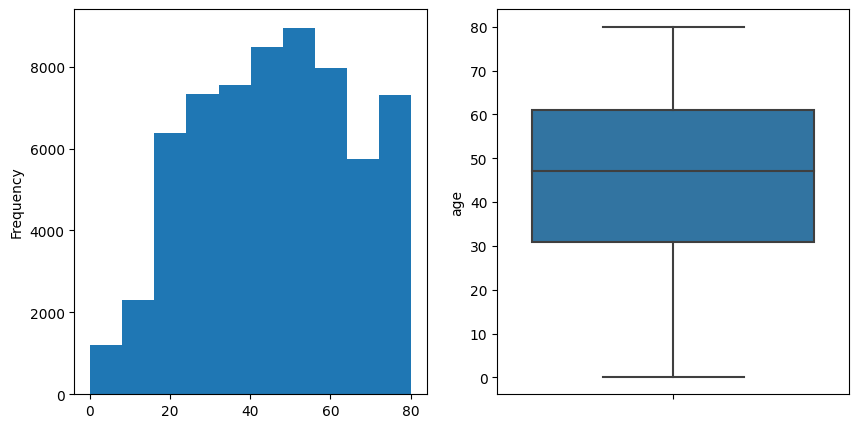

Column Name: bmi


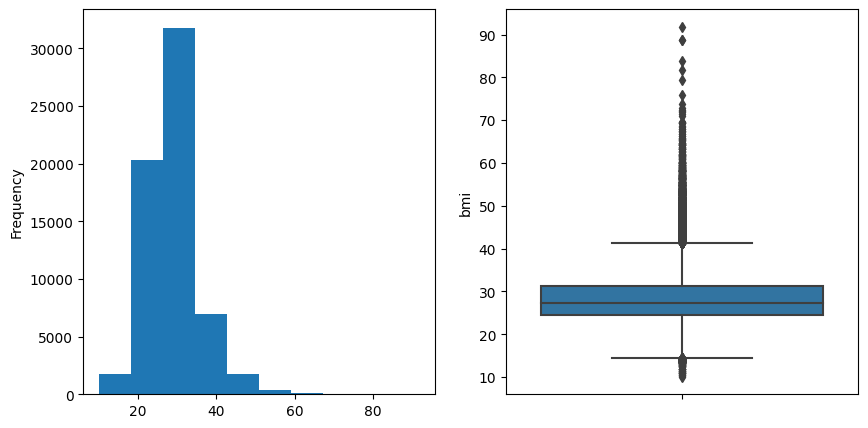

Column Name: HbA1c_level


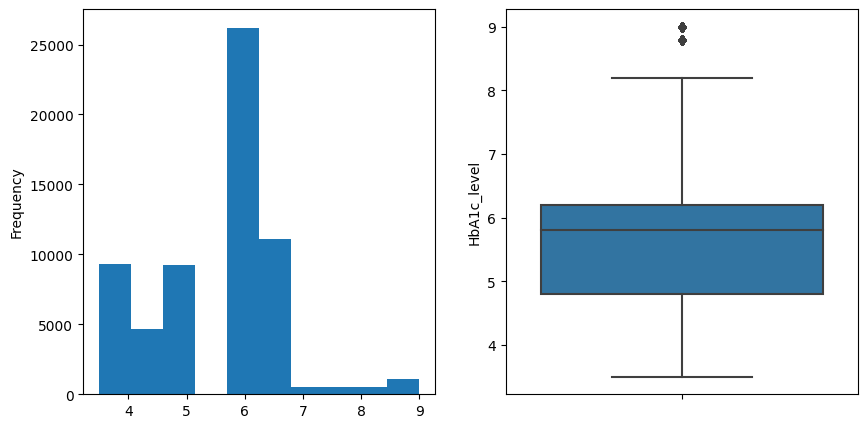

Column Name: blood_glucose_level


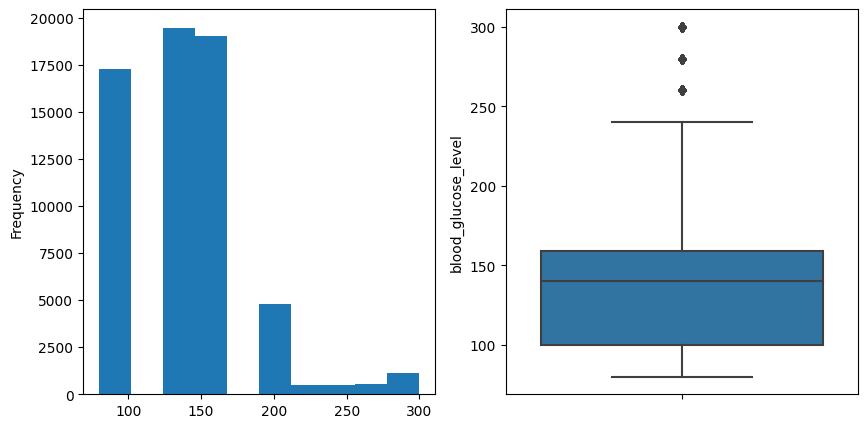

In [26]:
for col in num_columns:
    print("Column Name:", col)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(data_v2[col])
    plt.ylabel("Frequency")

    plt.subplot(1,2,2)
    sns.boxplot(y=data_v2[col])

    plt.show()

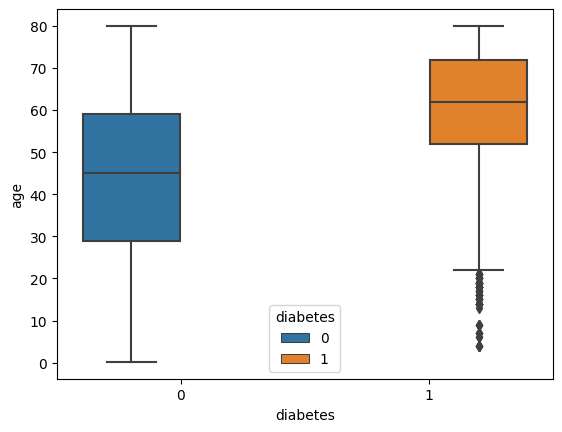

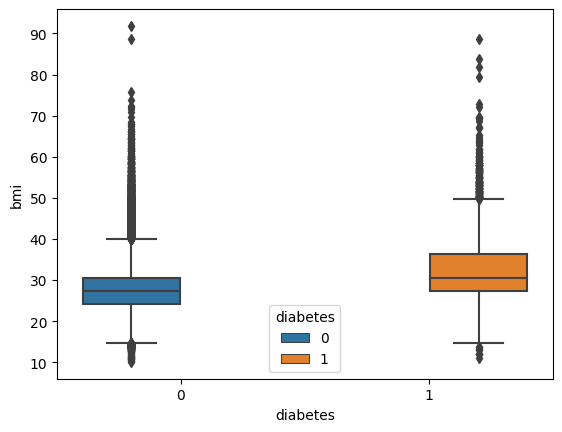

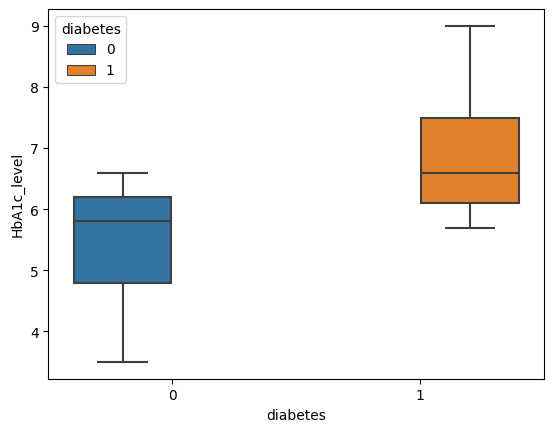

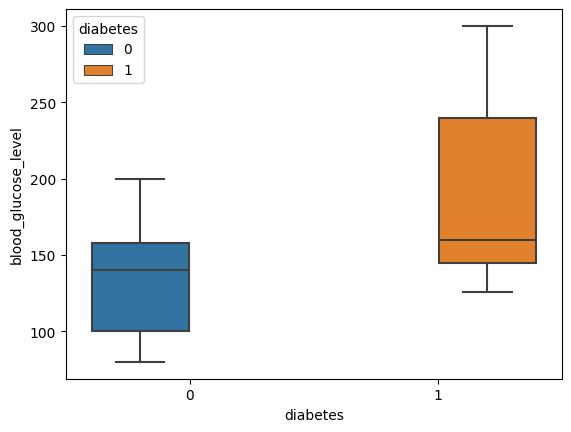

In [27]:
for item in num_columns:
    sns.boxplot(data=data_v2, x="diabetes", y=item, hue="diabetes")
    plt.show()

* The histogram shows that the distribution of BMI values is roughly bell-shaped, with a peak in the middle and decreasing numbers of people at the extremes. The mean BMI is around 25, which is in the overweight category. However, there is a wide range of BMI values, with some people having BMIs in the underweight or obese categories.

* The histogram shows a slight skew to the right, which means that there are more people with higher BMI values than there are people with lower BMI values.

* A normal HbA1c level is less than 5.7%. A level of 5.7% to 6.4% is considered prediabetes, and a level of 6.5% or higher is considered diabetes.

* The histogram shows that the majority of people in the dataset have HbA1c levels in the normal range. However, there is a significant minority of people with HbA1c levels in the prediabetes and diabetes ranges. This is concerning, as prediabetes and diabetes are major risk factors for heart disease, stroke, and other chronic diseases.

* A normal blood glucose level before eating is less than 100 mg/dL. A level of 100 to 125 mg/dL is considered prediabetes, and a level of 126 mg/dL or higher is considered diabetes.

* The histogram shows that the majority of people in the dataset have blood glucose levels in the normal range. However, there is a significant minority of people with blood glucose levels in the prediabetes and diabetes ranges.



In [28]:
cat_columns = ["gender","hypertension","heart_disease","smoking_history_trans","diabetes"]
for i in cat_columns:
    print(data_v2[i].value_counts(normalize=True))
    print('-'*45)

Female    0.603855
Male      0.396145
Name: gender, dtype: Float64
---------------------------------------------
0    0.900865
1    0.099135
Name: hypertension, dtype: Float64
---------------------------------------------
0    0.952314
1    0.047686
Name: heart_disease, dtype: Float64
---------------------------------------------
non smoker     0.54382
past          0.310766
present       0.145414
Name: smoking_history_trans, dtype: Float64
---------------------------------------------
0    0.888738
1    0.111262
Name: diabetes, dtype: Float64
---------------------------------------------


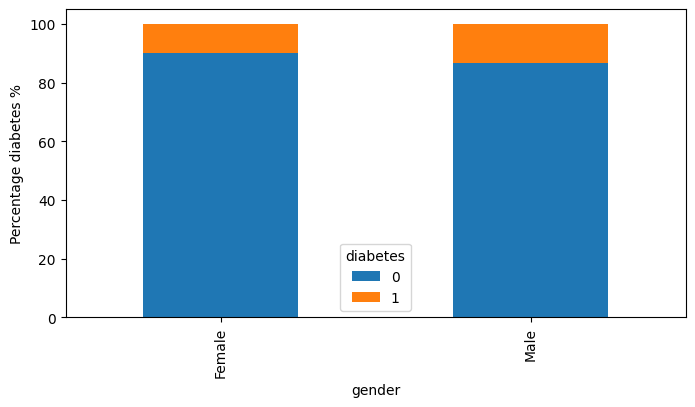

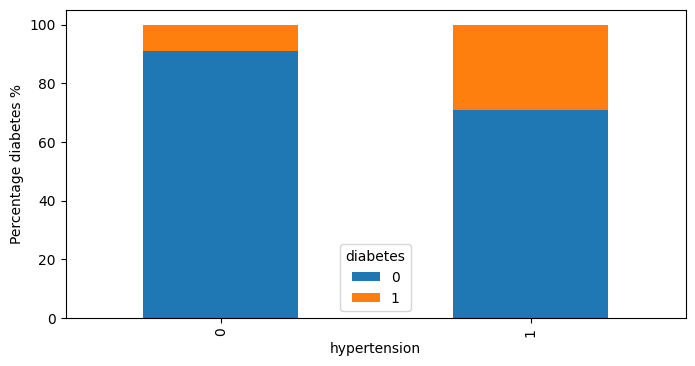

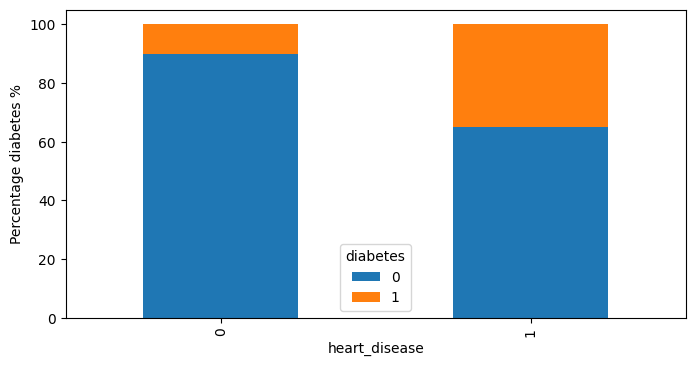

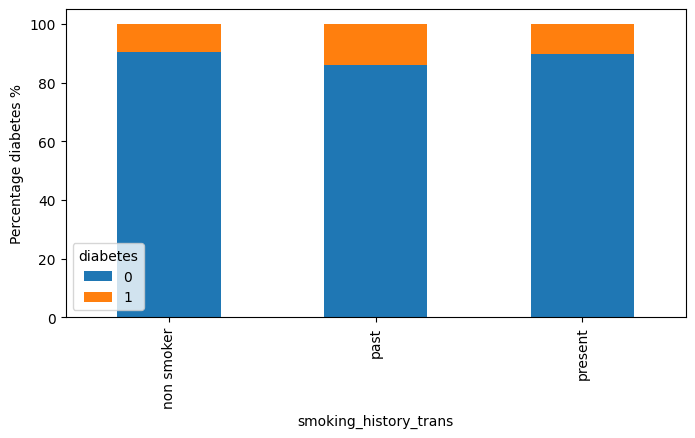

In [29]:
for i in cat_columns:
    if i!='diabetes':
        (pd.crosstab(data_v2[i],data_v2['diabetes'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage diabetes %')

**Gender Distribution:**
* Around 60.54% of the individuals in the dataset are female, and approximately 39.46% are male.

**Hypertension Distribution:**
* About 90.21% of the individuals in the dataset do not have hypertension, while approximately 9.79% have hypertension.

**Heart Disease Distribution:**
* Approximately 95.30% of the individuals in the dataset do not have heart disease, while about 4.70% have heart disease.

**Smoking History Distribution:**
* The majority, approximately 54.68%, of the individuals are non-smokers. Around 30.85% have a history of smoking, and about 14.47% are currently smokers.

**Diabetes Distribution:**
* Approximately 89.02% of the individuals in the dataset do not have diabetes, while about 10.98% have diabetes.


<ipython-input-30-29e2ec0bcce4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_v2.corr(), annot=True, fmt="0.2f", cmap = "crest").set_title("Correlation Table")


Text(0.5, 1.0, 'Correlation Table')

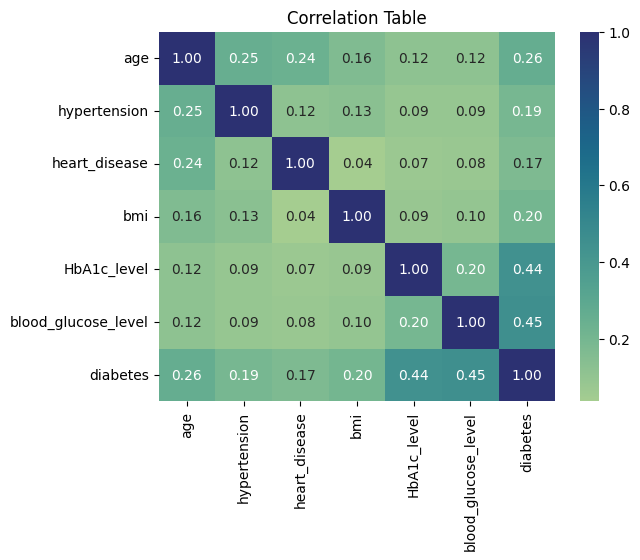

In [30]:
sns.heatmap(data_v2.corr(), annot=True, fmt="0.2f", cmap = "crest").set_title("Correlation Table")

* Age is positively correlated with all of the other variables, except for diabetes. This means that as people get older, they are more likely to have hypertension, heart disease, higher BMI, HbA1c levels, and blood glucose levels.

* Hypertension is positively correlated with heart disease, BMI, HbA1c level, blood glucose level, and diabetes. This means that people with hypertension are more likely to have heart disease, higher BMI, HbA1c levels, and blood glucose levels, and are more likely to have diabetes.

* Heart disease is positively correlated with BMI, HbA1c level, blood glucose level, and diabetes. This means that people with heart disease are more likely to have higher BMI, HbA1c levels, and blood glucose levels, and are more likely to have diabetes.

* BMI is positively correlated with HbA1c level, blood glucose level, and diabetes. This means that people with higher BMIs are more likely to have higher HbA1c levels, blood glucose levels, and are more likely to have diabetes.

* HbA1c level is positively correlated with blood glucose level and diabetes. This means that people with higher HbA1c levels are more likely to have higher blood glucose levels, and are more likely to have diabetes.

* Blood glucose level is positively correlated with diabetes. This means that people with higher blood glucose levels are more likely to have diabetes.

The correlation table shows that there are strong positive correlations between age, hypertension, heart disease, BMI, HbA1c level, blood glucose level, and diabetes. This means that people who have one of these risk factors are more likely to have other risk factors as well.


### **Model Creation**

In [31]:
data_v3 = data_v2.drop(["smoking_history"],axis=1)

In [32]:
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63247 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 63247 non-null  string 
 1   age                    63247 non-null  Float64
 2   hypertension           63247 non-null  Int64  
 3   heart_disease          63247 non-null  Int64  
 4   bmi                    63247 non-null  Float64
 5   HbA1c_level            63247 non-null  Float64
 6   blood_glucose_level    63247 non-null  Int64  
 7   diabetes               63247 non-null  Int64  
 8   smoking_history_trans  63247 non-null  string 
dtypes: Float64(3), Int64(4), string(2)
memory usage: 5.2 MB


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
to_get_dummies_for = ["gender","hypertension","heart_disease","smoking_history_trans"]

data_v4 = pd.get_dummies(data=data_v3, columns=to_get_dummies_for, drop_first=True)

In [35]:
Y = data_v4.diabetes
X = data_v4.drop(["diabetes"], axis = 1)

In [36]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
x_scaled = pd.DataFrame(X_scaled, columns = X.columns )

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=1, stratify=Y)

## **Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lg_model = LogisticRegression()

In [40]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

In [42]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(10,3))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["No Diabetes","Diabetes"],yticklabels=["No Diabetes","Diabetes"], linewidths=1)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Model Metrics Interpretation**
* In this model we're predicting the diabetes based on the important clinical records and past medical conditions. So the model should predict the person who is having high risk of getting diabetes than others.
* Based on the above point, it is necessary to **decresase the false negative** because if the patient is actually have diabetes but the model fails to predict would leads to not treating the patients properly.

Thus minimizing the false negatives is the major objective and model evaluation metric of this model in this business context.

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     40628
         1.0       0.64      0.86      0.73      3644

    accuracy                           0.95     44272
   macro avg       0.81      0.91      0.85     44272
weighted avg       0.96      0.95      0.95     44272



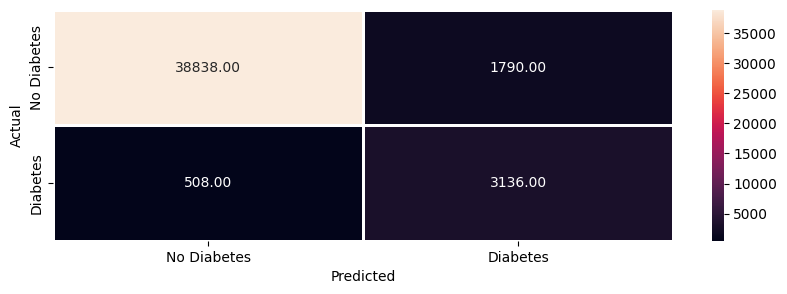

In [43]:
#confusionmatrix for training dataset
y_pred_train = lg_model.predict(x_train)
metrics_score(y_pred_train, y_train)

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     17421
         1.0       0.64      0.87      0.74      1554

    accuracy                           0.95     18975
   macro avg       0.81      0.91      0.85     18975
weighted avg       0.96      0.95      0.95     18975



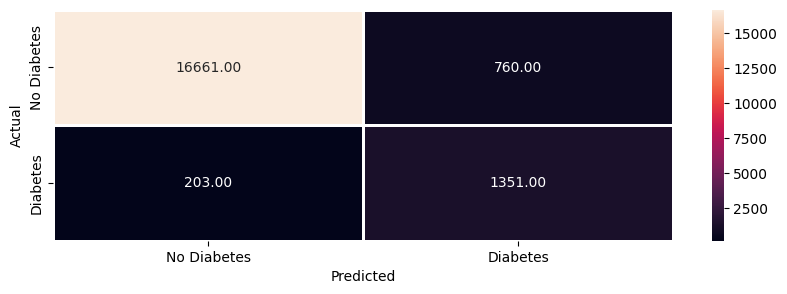

In [44]:
#Confusion Matrix for testing dataset
y_pred = lg_model.predict(x_test)
metrics_score(y_pred,y_test)

Based on the above two confusion matrix, we can conclude that
* The accuracy of the model almost remains same in both training and test dataset.
* The precision is increased as the false negative cases has decreased in the test dataset.

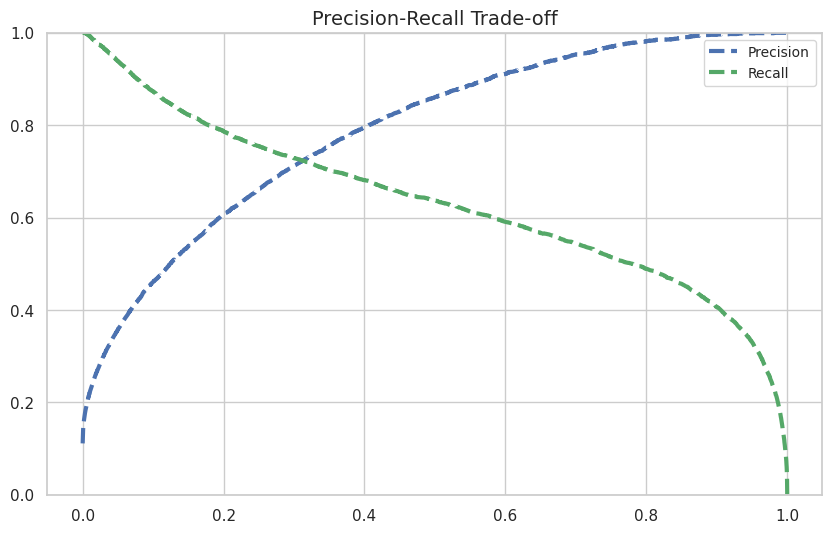

In [45]:
y_scores_lg = lg_model.predict_proba(x_train)
#y_scores_lg[:,1]
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.plot(thresholds_lg, precisions_lg[:-1], "b--", label ="Precision", linewidth=3)
plt.plot(thresholds_lg, recalls_lg[:-1], "g--", label = "Recall", linewidth=3)

plt.legend(loc="upper right", fontsize=10)
plt.title("Precision-Recall Trade-off", fontsize=14)
plt.ylim([0,1])

plt.show()

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     39346
         1.0       0.71      0.73      0.72      4926

    accuracy                           0.94     44272
   macro avg       0.84      0.85      0.84     44272
weighted avg       0.94      0.94      0.94     44272



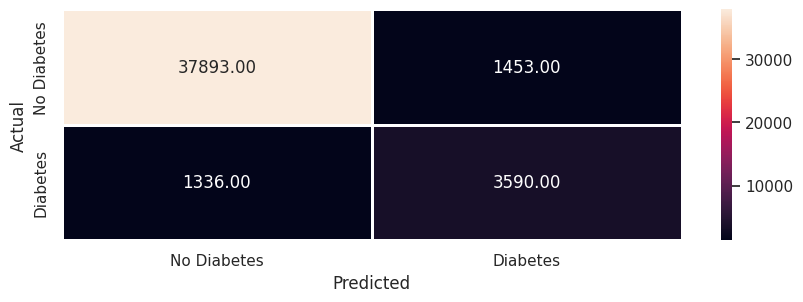

In [46]:
#Training Dataset
optimal_threshold = 0.3
y_pred_train_prob = lg_model.predict_proba(x_train)
metrics_score(y_train, y_pred_train_prob[:,1]>optimal_threshold)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     16864
         1.0       0.72      0.74      0.73      2111

    accuracy                           0.94     18975
   macro avg       0.84      0.85      0.85     18975
weighted avg       0.94      0.94      0.94     18975



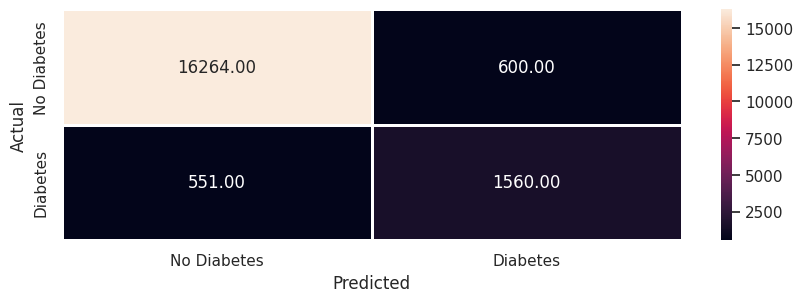

In [47]:
#testing dataset
y_pred_test_prob = lg_model.predict_proba(x_test)
metrics_score(y_test, y_pred_test_prob[:,1]>optimal_threshold)

Based on the comparison between the two models,
* Model 1: Threshold value of 0.5
* Model 2: Threshold value of 0.3

Still model 1 (Threshold Value = 0.5) performs well with high precision i.e minimum false negatives.


## **Decision Tree**

In [48]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier(random_state=42)

In [50]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred_train = tree.predict(x_train)

In [52]:
#Model Evaluation on training dataset
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_pred_train, y_train))

Accuracy: 0.9994578966389591


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39346
         1.0       1.00      1.00      1.00      4926

    accuracy                           1.00     44272
   macro avg       1.00      1.00      1.00     44272
weighted avg       1.00      1.00      1.00     44272



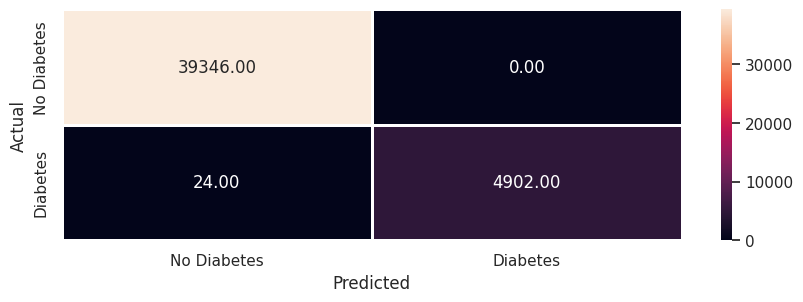

In [53]:
# Confusion Matrix on Training Dataset
metrics_score(y_train, y_pred_train)

Accuracy: 0.9381291172595521
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     16864
         1.0       0.71      0.75      0.73      2111

    accuracy                           0.94     18975
   macro avg       0.84      0.86      0.85     18975
weighted avg       0.94      0.94      0.94     18975



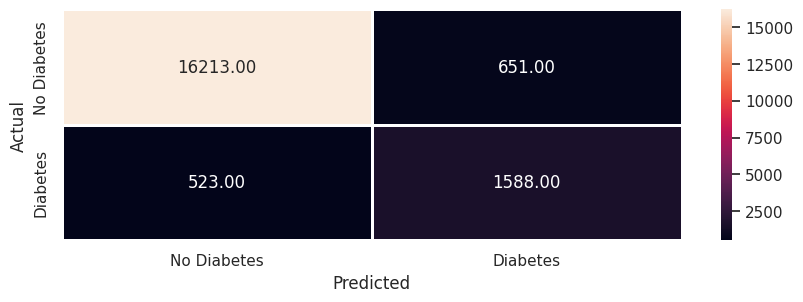

In [54]:
#Confusion Matrix on test data
y_pred_test = tree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
metrics_score(y_test, y_pred_test)

The above results suggests us the model performs well on the training dataset but not on the testing dataset. The model fails to generalize well on the testing dataset. This would leads to the overfitting of the model.

If the tree model is too complex with too many splits then it's easier to memorize the training dataset and fails to generalize on the test dataset.

To address this issue, we can prune the tree by means of reducing the number of splits. Thus it might reduce the overfitting.

Implementing the cross-validation, this will helps to identify the best parameters for the tree including the maximum depth.

<Axes: xlabel='Importance'>

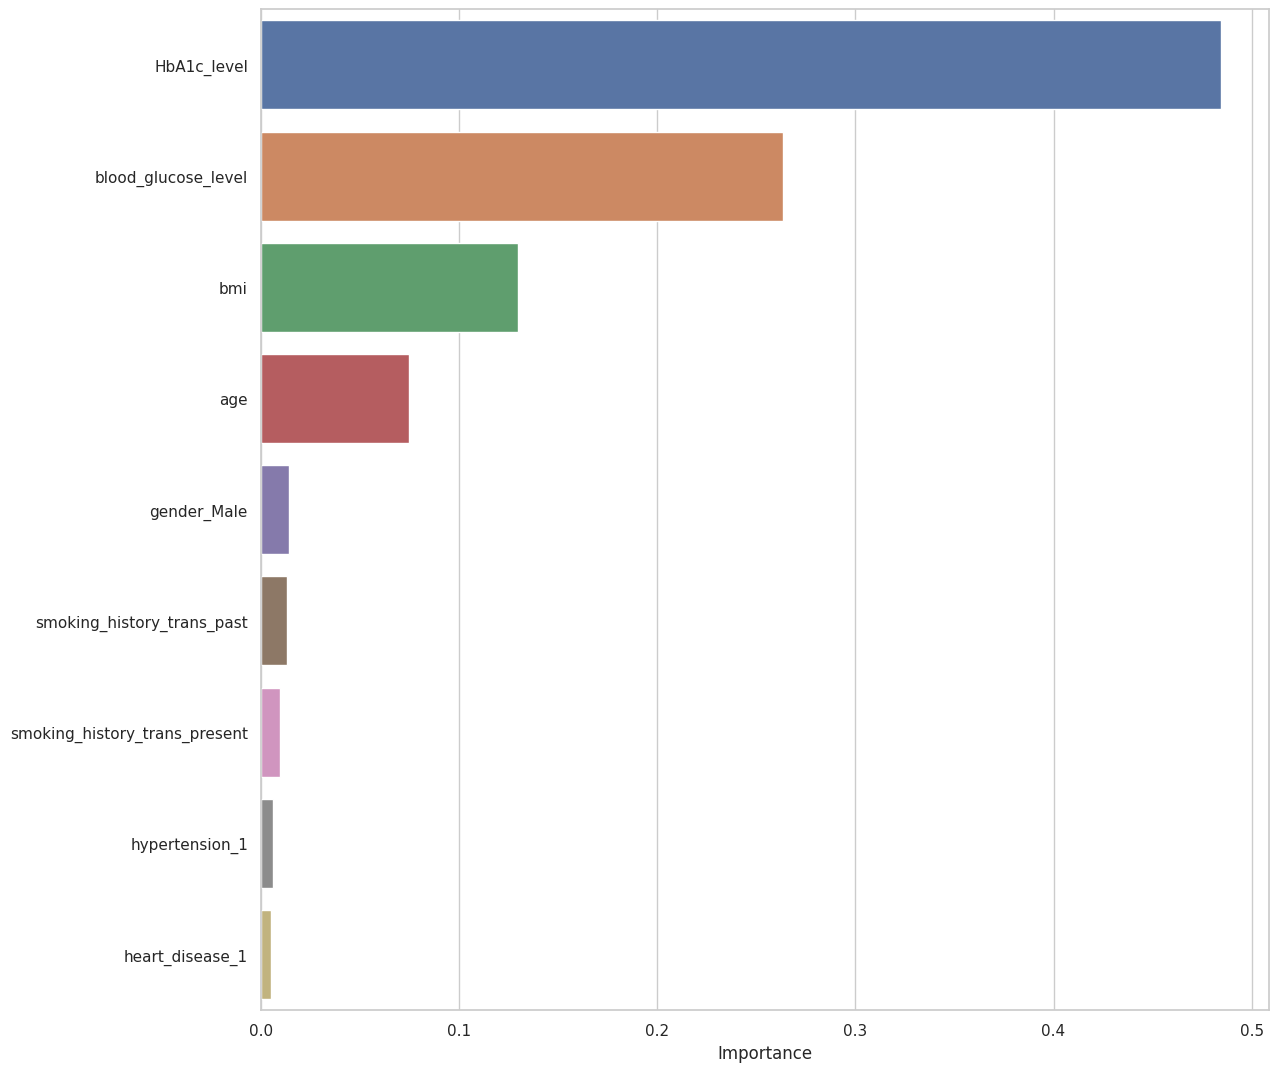

In [55]:
#plotting the importance plot
importances = tree.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

**GridSearchCV**

In [56]:
#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'max_depth': np.arange(2,7),
    'criterion': ['gini','entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="recall")
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [58]:
print("Best Hyperparametrs:", grid_search.best_params_)

Best Hyperparametrs: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
# Get the best model
prune_tree = grid_search.best_estimator_

Accuracy: 0.9625045175280087
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     39346
         1.0       1.00      0.66      0.80      4926

    accuracy                           0.96     44272
   macro avg       0.98      0.83      0.89     44272
weighted avg       0.96      0.96      0.96     44272



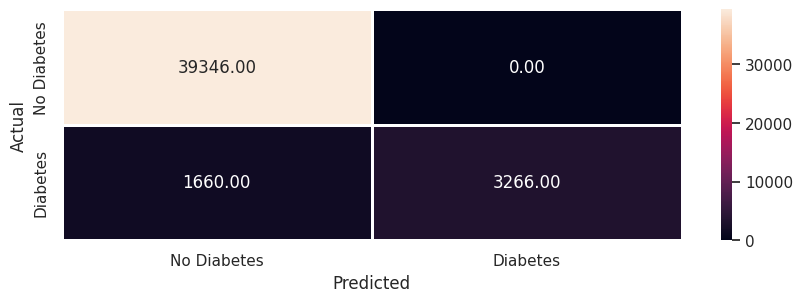

In [60]:
# Training Dataset
y_pred_train = prune_tree.predict(x_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))
metrics_score(y_train, y_pred_train)

Accuracy: 0.9634255599472991
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     16864
         1.0       1.00      0.67      0.80      2111

    accuracy                           0.96     18975
   macro avg       0.98      0.84      0.89     18975
weighted avg       0.96      0.96      0.96     18975



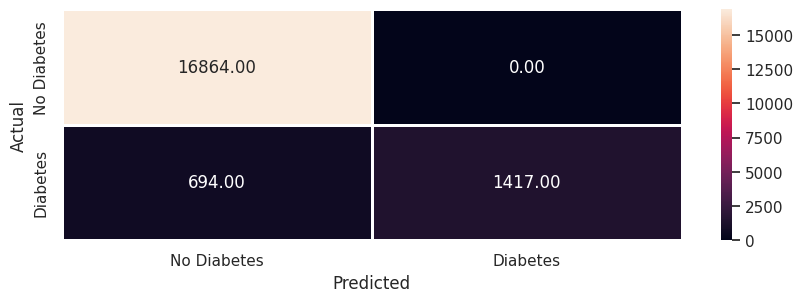

In [61]:
#Test Data
y_pred_test = prune_tree.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
metrics_score(y_test, y_pred_test)

* The two confusion matrices show that the tree model is performing better on the training dataset than on the test dataset. This suggests that the model may be overfitting the training data.

* Specifically, the model is more likely to predict "Diabetes" incorrectly on the test dataset than it is on the training dataset. This is evident from the higher number of false positives (FP) and false negatives (FN) in the test confusion matrix.

<Axes: xlabel='Importance'>

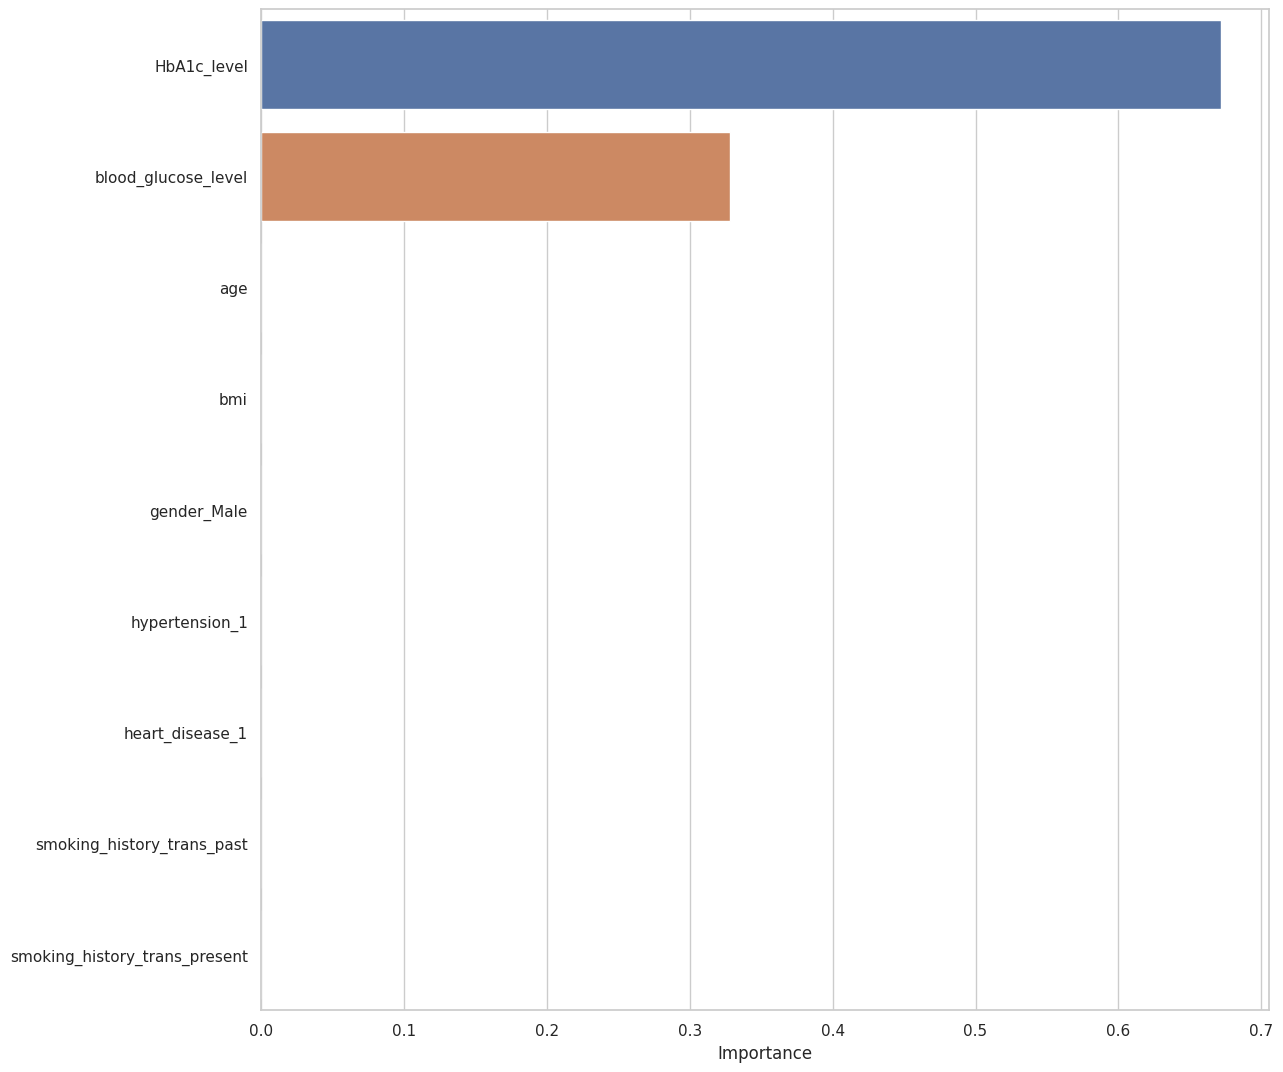

In [62]:
importances = prune_tree.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(x=importance_df.Importance,y=importance_df.index)

## **KNN Classifier**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn_clf =KNeighborsClassifier(n_neighbors = 3)

In [65]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred_train = knn_clf.predict(x_train)

Accuracy: 0.9657797253342971
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     39346
         1.0       0.94      0.74      0.83      4926

    accuracy                           0.97     44272
   macro avg       0.95      0.87      0.90     44272
weighted avg       0.97      0.97      0.96     44272



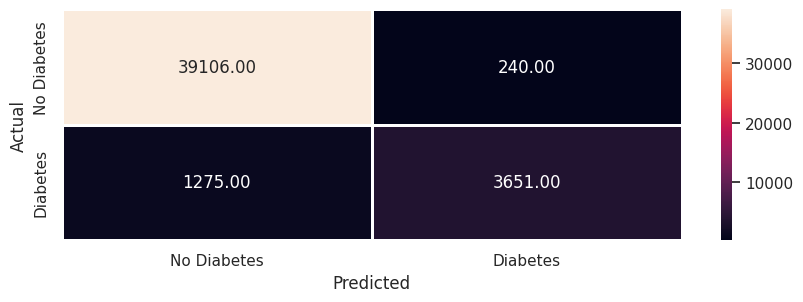

In [67]:
# Training Dataset
print("Accuracy:", accuracy_score(y_train, y_pred_train))
metrics_score(y_train, y_pred_train)

Accuracy: 0.9464031620553359
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     16864
         1.0       0.84      0.64      0.73      2111

    accuracy                           0.95     18975
   macro avg       0.90      0.81      0.85     18975
weighted avg       0.94      0.95      0.94     18975



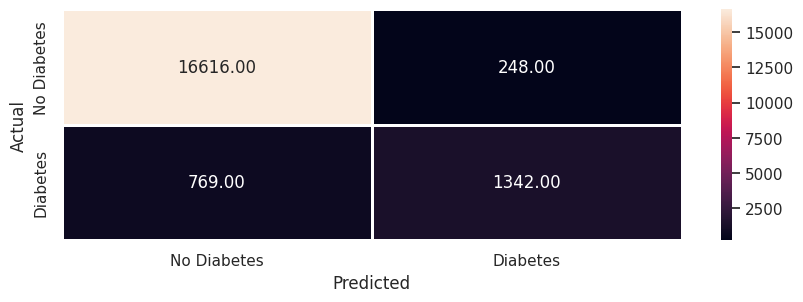

In [68]:
# Testing Dataset
y_pred_test = knn_clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
metrics_score(y_test, y_pred_test)

The two confusion matrices for the KNN classifier show that the model is performing slightly better on the training dataset than on the test dataset. This is evident from the higher accuracy score on the training dataset (96.58% vs 94.64%).

However, the difference in accuracy is relatively small, and the model is still performing well on the test dataset. This suggests that the model is not overfitting the training data.



In [69]:
# Getting the best value of K
# Method: Cross - Validation
from sklearn.model_selection import cross_val_score

k_values = list(range(1,21))

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x_train,y_train,cv=5)
    cv_scores.append(np.mean(score))


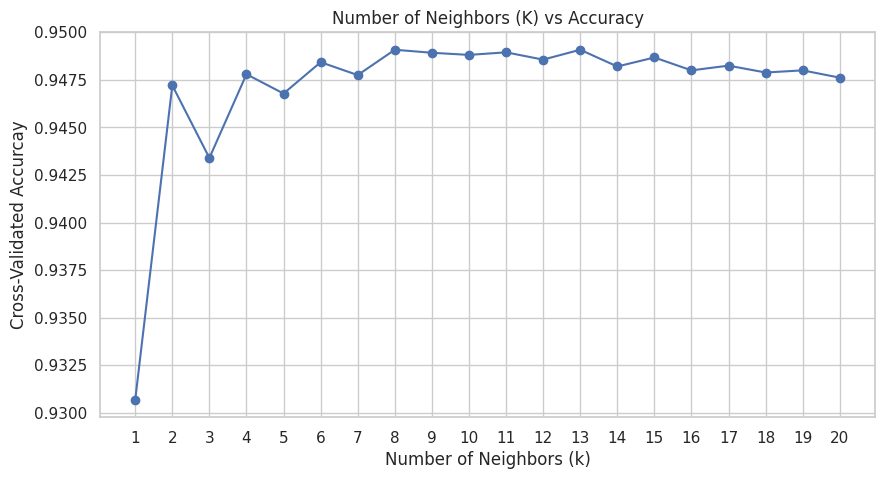

Optimal k Value: 13


In [70]:
#Visualization of different k and it's scores
plt.figure(figsize=(10,5))
plt.plot(k_values, cv_scores, marker="o")
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accurcay")
plt.title("Number of Neighbors (K) vs Accuracy")

plt.show()

optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal k Value:", optimal_k)

In [71]:
knn_clf_v2 =KNeighborsClassifier(n_neighbors = 13)
knn_clf_v2.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=13)

Accuracy: 0.9535823997108782
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     39346
         1.0       0.96      0.61      0.75      4926

    accuracy                           0.95     44272
   macro avg       0.96      0.80      0.86     44272
weighted avg       0.95      0.95      0.95     44272



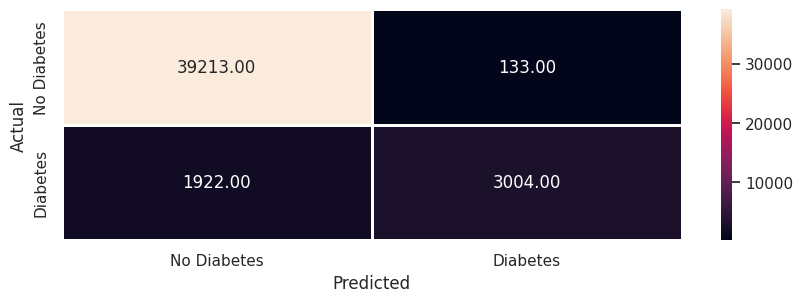

In [72]:
# Training Dataset
y_pred_train = knn_clf_v2.predict(x_train)
print("Accuracy:", accuracy_score(y_train, y_pred_train))
metrics_score(y_train,y_pred_train)

Accuracy: 0.949828722002635
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     16864
         1.0       0.95      0.58      0.72      2111

    accuracy                           0.95     18975
   macro avg       0.95      0.79      0.85     18975
weighted avg       0.95      0.95      0.94     18975



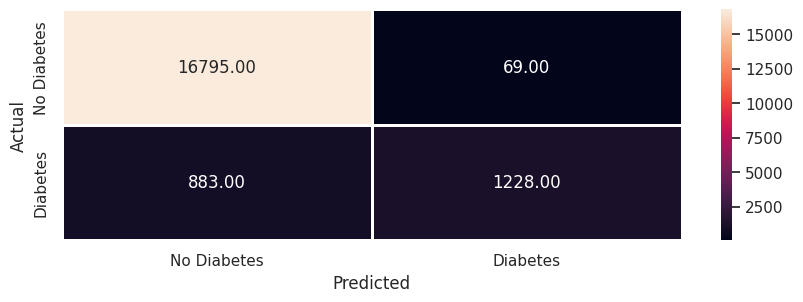

In [73]:
# Test Dataset
y_pred_test = knn_clf_v2.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
metrics_score(y_test, y_pred_test)

## **Conclusions and Recommendations**

**Conclusion**
* We tried multiple models to find key factors contributing to diabetes in a person based in their medical data.
* Final Model is Logistic regression with threshold of 0.5 which have less false negative rate. Thus Healthcare and Insurance providers can use this data to identify the person with diabetes early on.

**Recommendations**
* The highest percentage of individuals with diabetes falls within the 70-79 age group, followed by the 60-69 and 50-59 age groups. Conversely, the lowest prevalence of diabetes is observed in the 0-19 age group.

Age Group < 29 -> 1%
Age Group 30 - 59 -> 15%
**Age Group 60+ -> 86%**
Early detection of diabetes are crucial for younger and middle-aged adults, as they are less likely to develop diabetes but may have undiagnosed diabetes. On the other hand, interventions focused on managing diabetes and preventing complications are crucial for older adults, who have a higher risk of developing diabetes and its related complications. It is important to prioritize such interventions based on the age group and their respective risks.

* A weak positive correlation exists between BMI and diabetes, with a correlation value of 0.20. Increased BMI can lead to insulin resistance and inflammation, contributing to the development of diabetes. However, other factors can also affect the development of diabetes, and high BMI does not guarantee it.

If you are concerned about your risk of developing diabetes, there are a number of things you can do to reduce your risk:

Maintain a healthy weight. A BMI of 18.5 to 24.9 is considered healthy.

* Further, when HbA1c and Blood Glucose level increases in the blood, the person needs to take care of his health because the increase in the HbA1c and blood glucose level would lead to diabetes maintaining the optimal level of HbA1c and blood glucose level is important for the person. When it comes to prior health conditions such as hypertension and heart disease, 3 in 10 people with hypertension would have a chance of diabetes. There is a one in five people having heart disease would have the chance of having diabetes.